In [439]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # cv2.imshow() is disabled by colab hence this needs to be imported to display images
from matplotlib import pyplot as plt

##Question 4##

In [440]:
'''
blurredCar = cv2.imread("MakeNumberPlateReadable.jpg");
blurredCarGray = cv2.cvtColor(blurredCar,cv2.COLOR_BGR2GRAY);
cv2_imshow(blurredCarGray);
'''

'\nblurredCar = cv2.imread("MakeNumberPlateReadable.jpg");\nblurredCarGray = cv2.cvtColor(blurredCar,cv2.COLOR_BGR2GRAY);\ncv2_imshow(blurredCarGray);\n'

In [441]:
'''
dft = cv2.dft(np.float32(blurredCarGray),flags = cv2.DFT_COMPLEX_OUTPUT);  # Performs a forward or inverse Discrete Fourier transform of a 1D or 2D floating-point array. 
# https://docs.opencv.org/3.4/d2/de8/group__core__array.html#gadd6cf9baf2b8b704a11b5f04aaf4f39d
dft_shift = np.fft.fftshift(dft); # Shift the zero-frequency component to the center of the spectrum. https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html 
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])); # Take log of magnitude spectrum for proper visulaization as dynamic range of Fourier Coefficients is very large 
print("Magnitude Spectrum of car image: ");
cv2_imshow(magnitude_spectrum); # Display the magnitude spectrum
'''

'\ndft = cv2.dft(np.float32(blurredCarGray),flags = cv2.DFT_COMPLEX_OUTPUT);  # Performs a forward or inverse Discrete Fourier transform of a 1D or 2D floating-point array. \n# https://docs.opencv.org/3.4/d2/de8/group__core__array.html#gadd6cf9baf2b8b704a11b5f04aaf4f39d\ndft_shift = np.fft.fftshift(dft); # Shift the zero-frequency component to the center of the spectrum. https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html \nmagnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])); # Take log of magnitude spectrum for proper visulaization as dynamic range of Fourier Coefficients is very large \nprint("Magnitude Spectrum of car image: ");\ncv2_imshow(magnitude_spectrum); # Display the magnitude spectrum\n'

##Question 5##

Examples of first 5 good quality images: 


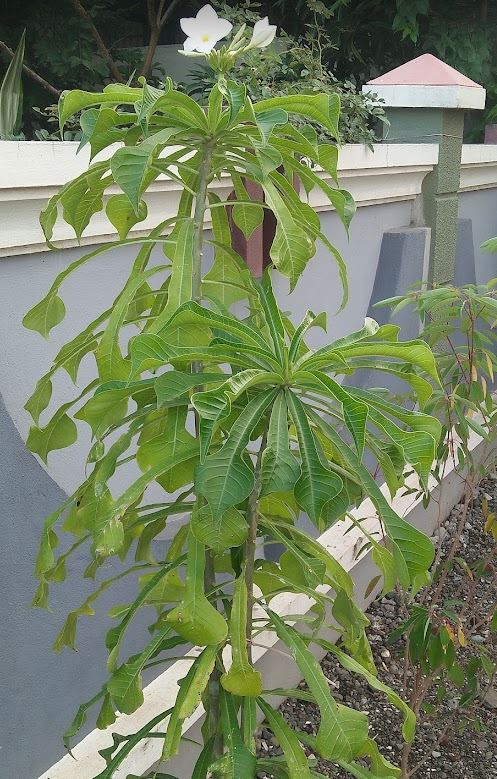

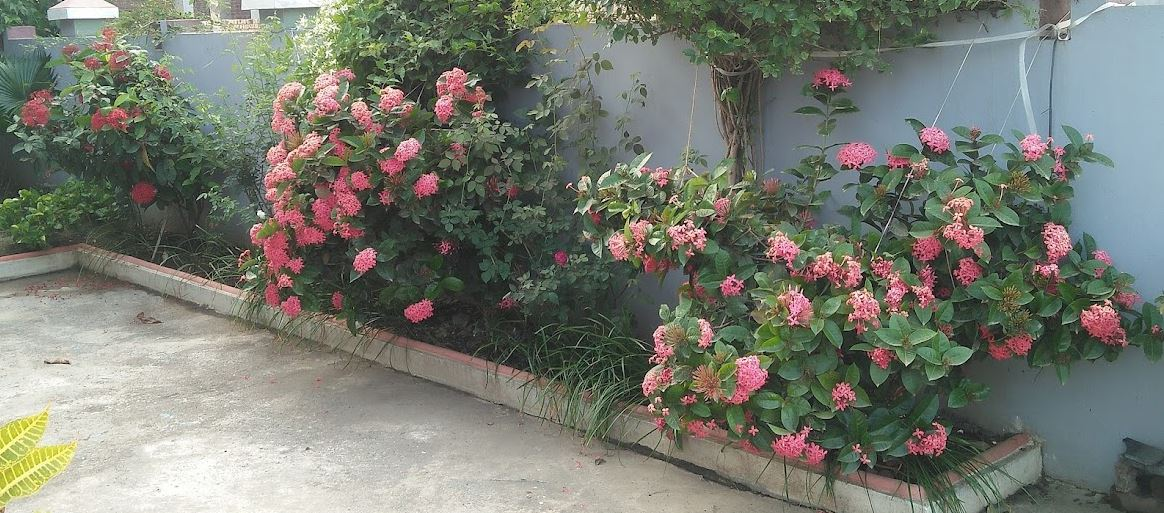

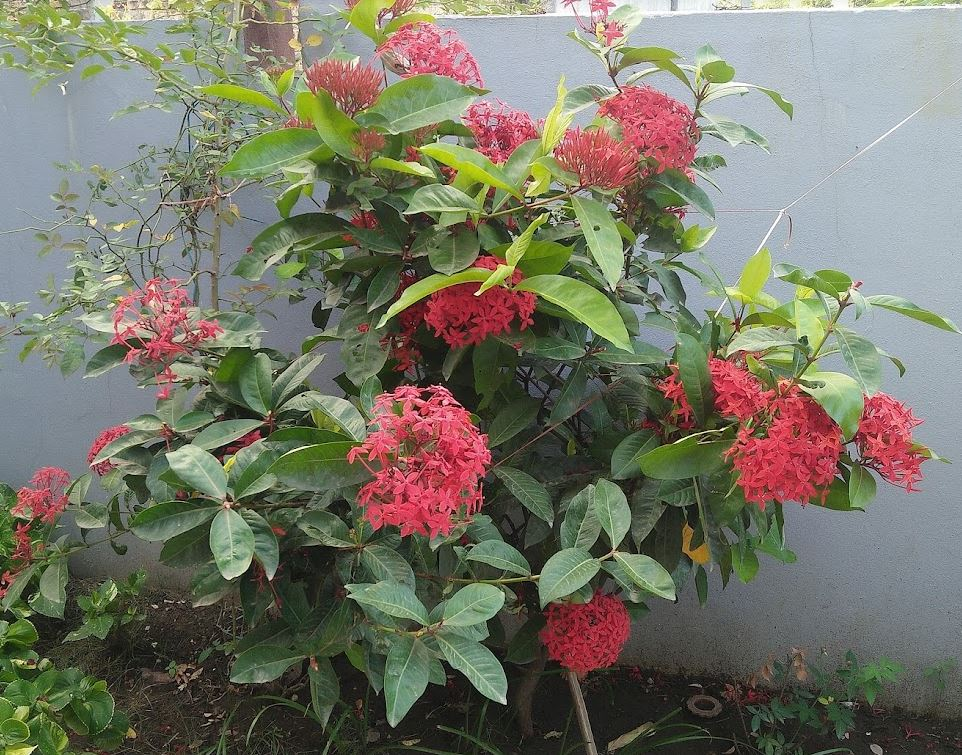

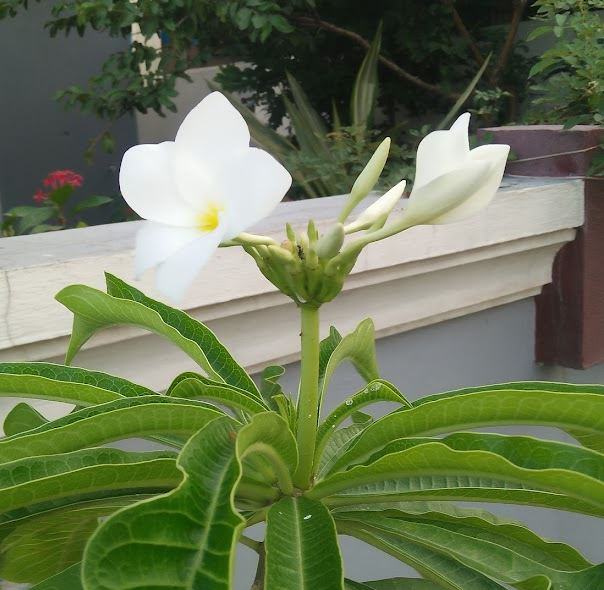

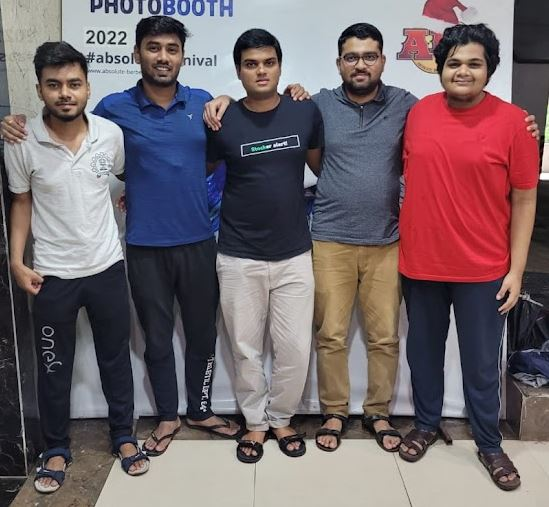


 Examples of first five bad quality images: 


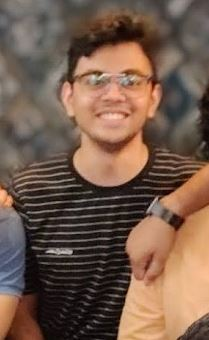

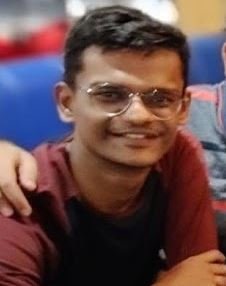

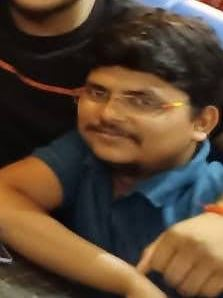

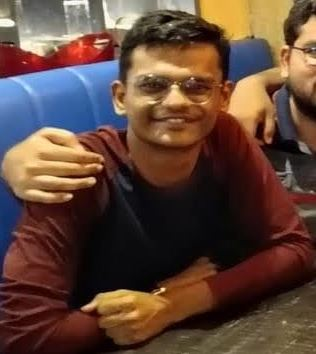

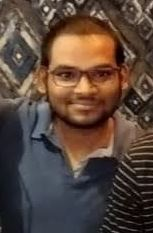

In [442]:
'''
Question 5(a) Select a few images from my personal collection and divided it into good and bad images.
The program below displays few of the good and bad images from my own collection of images
First 5 images from each of the good and bad image datasets
'''

print("Examples of first 5 good quality images: ")
for i in range(1,6,1):
  im = cv2.imread("/content/Good Images/g ("+ str(i)+").JPG");
  cv2_imshow(im);
print("\n Examples of first five bad quality images: ");

for i in range(1,6,1):
  im = cv2.imread("/content/Bad Images/b ("+ str(i)+").JPG");
  cv2_imshow(im);

**Observations for Question 5(b):**

1) I have taken a collection of 37 good images and 21 bad images. Out of these for displaying purpose I have displayed only first five images from both the folders.

2) All the good images are clear with a good resolution and contrast. While all the bad images suffer from low contrast and blurring issues.

3) Some images in the bad colection also have low brightness issue.

4) I conclude that the bad images predominantly face contrast, brightness and blurring issues.

In [443]:
'''
Question 5(C) In this code cell we divide the dataset of 37 good images into training and validation datasets
If we divide the dataset into 80% training and 20% validation images then there are 29 Training images and 8 validaiton images 
'''

for i in range(1,28,1):
  im = cv2.imread("/content/Good Images/g ("+ str(i)+").JPG");
  im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY);
  cv2.imwrite("/content/Training/t ("+str(i)+").JPG",im_gray);
for i in range(28,34,1):
  im = cv2.imread("/content/Good Images/g ("+ str(i)+").JPG");
  im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY);
  cv2.imwrite("/content/Validation/v ("+str(i-27)+").JPG",im_gray);

**Observations:**

1) We have created different folders with 80% of all good images into "Training" folder and remaining 20% taken as validation images into "Validation".

2) First all the images are read and then converted into grayscale and then they are saved to "Training" and "Validation" folders.

In [444]:
'''
Question 5(d) Degrading the good images using the degradation process:
1) Contrast and brightness change  2) Blurring  3) Noise addition 
References: https://docs.opencv.org/3.4/d4/d13/tutorial_py_filtering.html
https://theailearner.com/2019/05/07/add-different-noise-to-an-image/
'''
from numpy.core.memmap import dtype

# Corresponding to each image in the training and validation folder there will be a degraded version of the same image
brightFactor = 0.8;
noise_mean = 0;
noise_var = 16;
for i in range(1,28,1): # Apply degradation to training images
  im = cv2.imread("/content/Training/t ("+ str(i)+").JPG",cv2.IMREAD_GRAYSCALE);
  bright_im = np.array(255*0.8*(im/ 255), dtype = 'uint8'); # Reduce the brightness of each pixel by a factor of 0.8
  blur_im = cv2.blur(bright_im,(3,3));  # Apply a 5*5 blurring filter on the image
  gaus_noise = np.random.normal(noise_mean, np.sqrt(noise_var), blur_im.shape);
  gaus_noise.reshape(blur_im.shape[0],blur_im.shape[1]).astype('uint8');
  noise_img = cv2.add(blur_im,gaus_noise,dtype = cv2.CV_8U);
  cv2.imwrite("/content/Training/degraded ("+str(i)+").JPG",noise_img);

for i in range(1,7,1): # Apply degradation to training images
  im = cv2.imread("/content/Validation/v ("+ str(i)+").JPG",cv2.IMREAD_GRAYSCALE);
  bright_im = np.array(255*0.8*(im/ 255), dtype = 'uint8'); # Reduce the brightness of each pixel by a factor of 0.8
  blur_im = cv2.blur(bright_im,(3,3));  # Apply a 5*5 blurring filter on the image
  gaus_noise = np.random.normal(noise_mean, np.sqrt(noise_var), blur_im.shape);
  gaus_noise.reshape(blur_im.shape[0],blur_im.shape[1]).astype('uint8');
  noise_img = cv2.add(blur_im,gaus_noise,dtype = cv2.CV_8U);
  cv2.imwrite("/content/Validation/degraded ("+str(i)+").JPG",noise_img);

Degraded training image sample: 


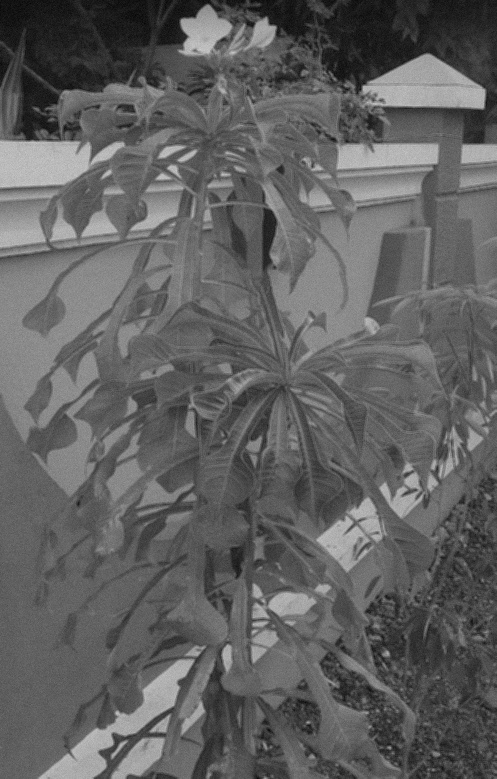

Degraded validation image sample: 


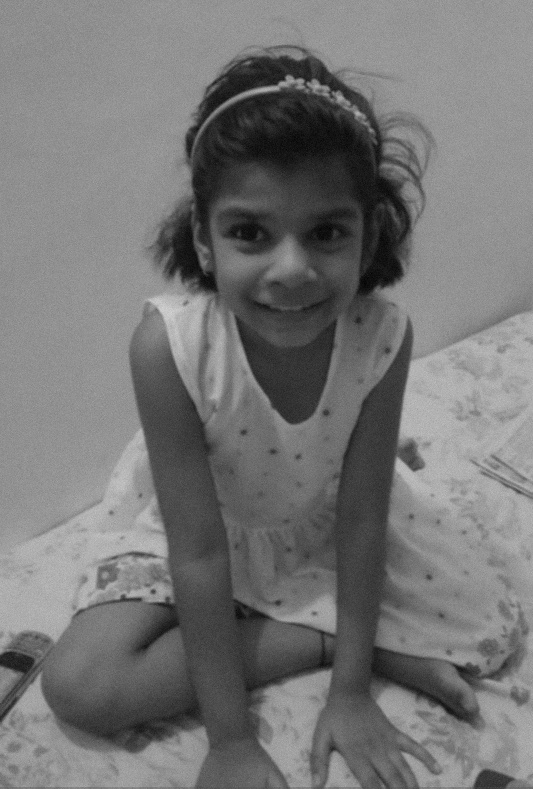

Degraded training image sample: 


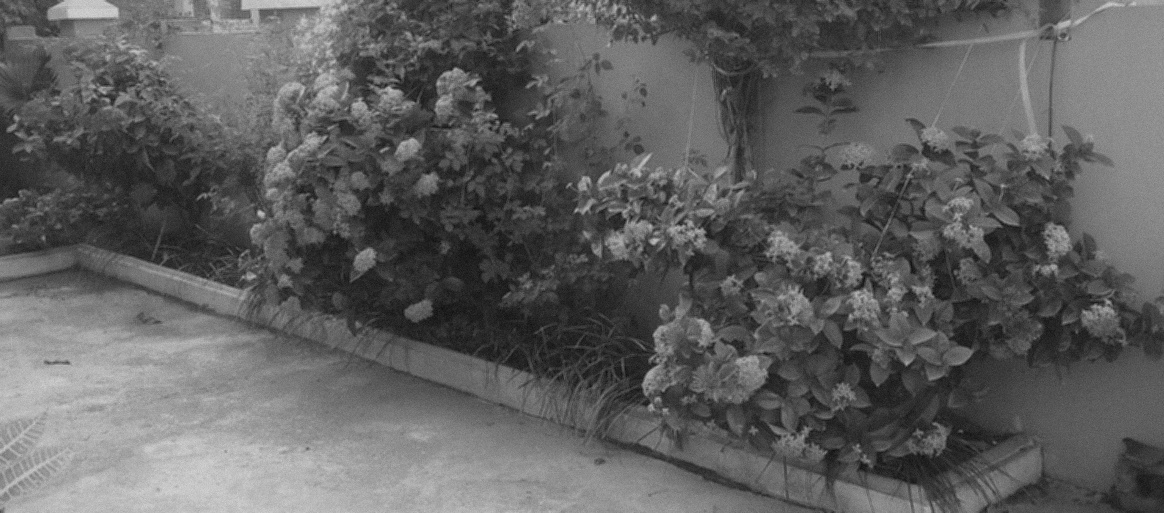

Degraded validation image sample: 


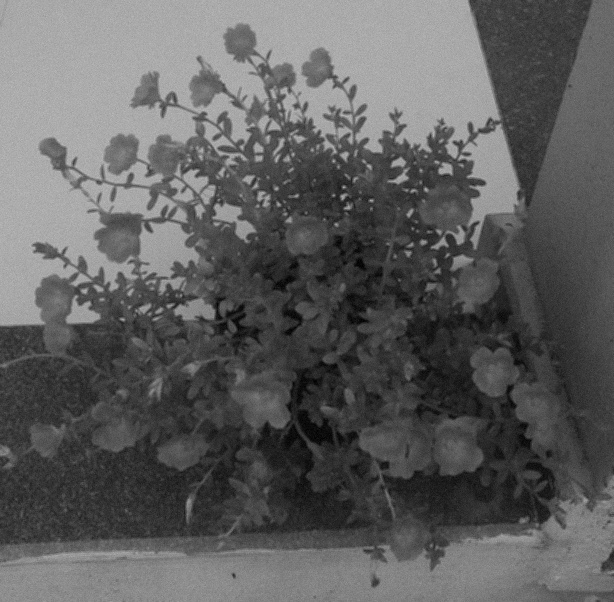

Degraded training image sample: 


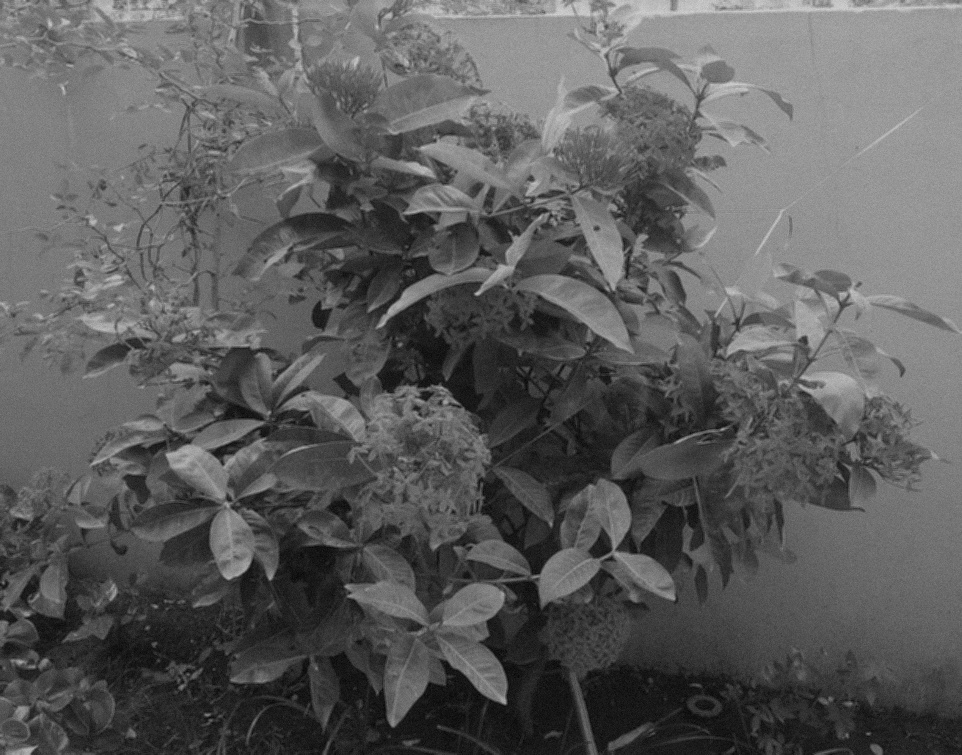

Degraded validation image sample: 


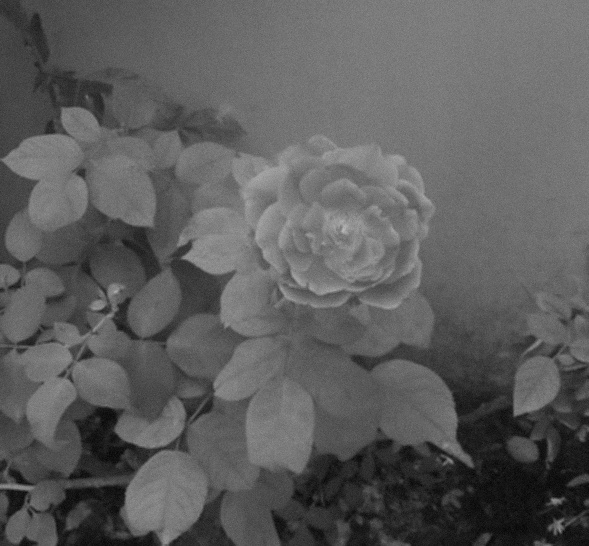

In [445]:
# 3 samples each of degraded images from training and validation folders is shown below:
for i in range(1,4,1):
  print("Degraded training image sample: ");
  im = cv2.imread("/content/Training/degraded ("+ str(i)+").JPG",cv2.IMREAD_GRAYSCALE);
  cv2_imshow(im);
  print("Degraded validation image sample: ");
  im = cv2.imread("/content/Validation/degraded ("+ str(i)+").JPG",cv2.IMREAD_GRAYSCALE);
  cv2_imshow(im);

**Observations:**

1) I have degraded the original good quality images into degraded images by applying brightness chnage by multiplying by 0.8, blurring using average filter and addition of standard normal Gaussian noise.

2) Corresponding to each good quality image we have created a bad quality degraded grayscale image.

In [446]:
'''
Question 5(e) 
Reference: https://stackoverflow.com/questions/45022549/extract-random-patches-from-foreground-image-in-python
'''
# Here we extract random patches from each of the degraded versions of training images
patches_per_image = 20;
numTrainImages = 27;
N = numTrainImages*patches_per_image;
W = 7;
patch_count = 0;
train_image_patches = np.zeros((N,W,W),dtype=np.uint8);
train_central_pixel = np.zeros((N,1));

for i in range(1,numTrainImages+1,1):
  degraded_im = cv2.imread("/content/Training/degraded ("+ str(i)+").JPG",cv2.IMREAD_GRAYSCALE);
  orig_im = cv2.imread("/content/Training/t ("+ str(i)+").JPG",cv2.IMREAD_GRAYSCALE);
  count = 0;
  while count<patches_per_image and patch_count<N:  # Take only 5 strips from any degraded training image
    topLeft_rowInd = np.random.randint(0,degraded_im.shape[0]-W); # maximum values is excluded by the function
    topLeft_ColInd = np.random.randint(0,degraded_im.shape[1]-W);  # maximum values is excluded by the function
    train_central_pixel[patch_count] = orig_im[topLeft_rowInd + int((W-1)/2),topLeft_ColInd + int((W-1)/2)];
    train_image_patches[patch_count,:,:] = degraded_im[topLeft_rowInd:topLeft_rowInd+W, topLeft_ColInd:topLeft_ColInd+W];
    #print("Patch number: " + str(patch_count));
    #print("Central pizel value of the patch: " + str(train_central_pixel[patch_count]));
    #cv2_imshow(train_image_patches[patch_count,:,:]);
    patch_count = patch_count + 1;
    count = count +1; 

In [447]:
'''
Question 5(f) 
Reference: https://stackoverflow.com/questions/45022549/extract-random-patches-from-foreground-image-in-python
'''
# Here we extract random patches from each of the degraded versions of val images
numValImages = 6;
M = numValImages*patches_per_image;
patch_count = 0;
val_image_patches = np.zeros((M,W,W),dtype=np.uint8);
val_central_pixel = np.zeros((M,1));
for i in range(1,numValImages+1,1):
  degraded_im = cv2.imread("/content/Validation/degraded ("+ str(i)+").JPG",cv2.IMREAD_GRAYSCALE);
  orig_im = cv2.imread("/content/Validation/v ("+ str(i)+").JPG",cv2.IMREAD_GRAYSCALE);
  count = 0;
  while count<patches_per_image and patch_count<M:  # Take only 5 strips from any degraded val image
    topLeft_rowInd = np.random.randint(0,degraded_im.shape[0]-W); # maximum values is excluded by the function
    topLeft_ColInd = np.random.randint(0,degraded_im.shape[1]-W);  # maximum values is excluded by the function
    val_central_pixel[patch_count] = orig_im[topLeft_rowInd + int((W-1)/2),topLeft_ColInd + int((W-1)/2)];
    val_image_patches[patch_count,:,:] = degraded_im[topLeft_rowInd:topLeft_rowInd+W, topLeft_ColInd:topLeft_ColInd+W];
    #print("Patch number: " + str(patch_count));
    #print("Central pixel value of the patch: " + str(val_central_pixel[patch_count]));
    #cv2_imshow(val_image_patches[patch_count,:,:]);
    patch_count = patch_count + 1;
    count = count +1; 

In [448]:
'''
Question 5(g)
'''
from sklearn.svm import SVR

C_arr = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3];
epsilon_arr = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3];
Gamma =  [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3];
train_image_patches_reshaped = train_image_patches.reshape((train_image_patches.shape[0],train_image_patches.shape[1]*train_image_patches.shape[2]));
val_image_patches_reshaped = val_image_patches.reshape((val_image_patches.shape[0], val_image_patches.shape[1]*val_image_patches.shape[2]));
mse = np.zeros((len(C_arr)**3,1));
c_ind = 0;
eps_ind = 0;
g_ind = 0;
ind = 0;
for c in C_arr:
  for eps in epsilon_arr:
    for g in Gamma:
      regressor = SVR(kernel='rbf', C = c, epsilon=eps, gamma= g);
      regressor.fit(train_image_patches_reshaped, train_central_pixel.ravel());
      y_pred = regressor.predict(val_image_patches_reshaped);
      mse[ind] = np.sqrt(np.sum((val_central_pixel.ravel()-y_pred)**2)/val_central_pixel.shape[0]);
      c_ind = (c_ind+1)%5;
      eps_ind = (eps_ind+1)%5;
      g_ind = (g_ind+1)%5;
      print("C = " + str(c)+ " Epsilon = " + str(eps) +" Gamma= " + str(g)+" MSE= " + str(mse[ind]));
      ind = ind +1;

print("Minimum RMSE on validation images = " + str(min(mse)));
#a,b,c = np.where(mse == min(mse.ravel()));
#print("C = " + str(C_arr[a]) + ' Epsilon = ' + str(epsilon_arr[b] + ' Gamma = ' + str(Gamma[c])));

C = 0.0001 Epsilon = 0.0001 Gamma= 0.0001 MSE= [60.58317456]
C = 0.0001 Epsilon = 0.0001 Gamma= 0.001 MSE= [60.58506761]
C = 0.0001 Epsilon = 0.0001 Gamma= 0.01 MSE= [60.58513294]
C = 0.0001 Epsilon = 0.0001 Gamma= 0.1 MSE= [60.58513294]
C = 0.0001 Epsilon = 0.0001 Gamma= 1.0 MSE= [60.58513294]
C = 0.0001 Epsilon = 0.0001 Gamma= 10.0 MSE= [60.58513294]
C = 0.0001 Epsilon = 0.0001 Gamma= 100.0 MSE= [60.58513294]
C = 0.0001 Epsilon = 0.0001 Gamma= 1000.0 MSE= [60.58513294]
C = 0.0001 Epsilon = 0.001 Gamma= 0.0001 MSE= [60.58317345]
C = 0.0001 Epsilon = 0.001 Gamma= 0.001 MSE= [60.58506761]
C = 0.0001 Epsilon = 0.001 Gamma= 0.01 MSE= [60.58513294]
C = 0.0001 Epsilon = 0.001 Gamma= 0.1 MSE= [60.58513294]
C = 0.0001 Epsilon = 0.001 Gamma= 1.0 MSE= [60.58513294]
C = 0.0001 Epsilon = 0.001 Gamma= 10.0 MSE= [60.58513294]
C = 0.0001 Epsilon = 0.001 Gamma= 100.0 MSE= [60.58513294]
C = 0.0001 Epsilon = 0.001 Gamma= 1000.0 MSE= [60.58513294]
C = 0.0001 Epsilon = 0.01 Gamma= 0.0001 MSE= [60.5831734